# Notebook per la creazione e addestramento della rete neurale convoluzionale **ExoHunter** 

# Installazione della libreria `keras_tuner`

In [ ]:
!pip install keras_tuner

# Import delle librerie

In [ ]:
import numpy as np
import visualkeras
# import keras_tuner as kt
# from keras_tuner.tuners import BayesianOptimization
# from keras_tuner.engine.hyperparameters import HyperParameters
import tensorflow
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

Caricamento dei dati

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
X_train = np.load('/content/drive/MyDrive/dati/train/X_train.npy')
Y_train = np.load('/content/drive/MyDrive/dati/train/Y_train.npy')
X_test = np.load('/content/drive/MyDrive/dati/test/X_test.npy')
Y_test = np.load('/content/drive/MyDrive/dati/test/Y_test.npy')
X_val = np.load('/content/drive/MyDrive/dati/val/X_val.npy')
Y_val = np.load('/content/drive/MyDrive/dati/val/Y_val.npy')

In [ ]:
print("X_train: {}, X_val: {}, X_test: {}".format(X_train.shape,X_val.shape,X_test.shape))

X_train: (15592, 2001, 1), X_val: (1733, 2001, 1), X_test: (1925, 2001, 1)


# Funzione per la creazione del modello. Per i parametri si può consultare la tesi.

In [ ]:
def build_exoHunter(hp):

  exoHunter = keras.Sequential(name = 'exoHunter')
  
  hp_num_conv_layers_first = hp.Int('num_conv_1',0,3) #numero di layer convoluzionali nel primo blocco
  hp_num_conv_layers_second = hp.Int('num_conv_2',0,3) #numero di layer convoluzionali nel secondo blocco
  hp_num_conv_layers_third = hp.Int('num_conv_3',0,3) #numero di layer convoluzionali nel terzo blocco
  hp_num_conv_layers_fourth = hp.Int('num_conv_4',0,3) #numero di layer convoluzionali nel quarto blocco
  hp_num_conv_layers_fifth = hp.Int('num_conv_5',0,3) #numero di layer convoluzionali nel quinto blocco

  hp_filters_input = hp.Choice('number_filters_input', values = [8, 16]) #numero di filtri nello strato di input
  hp_kernel_size = hp.Choice('kernel_size', values = [3, 5]) #dimensione del kernel negli strati convoluzionali

  hp_pool_size = hp.Choice('pool_size', values = [2, 3, 5]) #dimensione del pool negli strati di MaxPooling
  hp_pool_stride = hp.Choice('pool_stride', values = [1,2,3]) #numero di passi negli strati di MaxPooling

  hp_num_dense = hp.Int('num_dense',1,5) #numero di strati completamente connessi
  hp_dense_units = hp.Choice('num_dense_units', values = [32, 64, 128, 512, 1028]) #numero di neuroni negli strati completamente connessi

  hp_lr = hp.Choice('learning_rate', values = [0.001, 0.0001, 0.00001, 0.000001]) #valori del learning rate
  hp_dropout = hp.Float('dropout_rate', min_value = 0.30, max_value = 0.85, step = 0.05, default = 0.50)

  ###################################################
  exoHunter.add(layers.Conv1D(filters = hp_filters_input, kernel_size = hp_kernel_size, strides = 1, input_shape = (2001,1),name = 'input_layer'))
  
  ###################################################
  if hp_num_conv_layers_first > 0:
    print('hp_num_conv_layers_first:', hp_num_conv_layers_first)
    for i in range(hp_num_conv_layers_first):

      hp_filters_first = hp.Choice('first_block_filters_' + str(i), values=[8, 16])
      print('hp_filters_first_'+str(i)+':', hp_filters_first)
      exoHunter.add(layers.Conv1D(filters = hp_filters_first, kernel_size = hp_kernel_size, strides = 1, name = '1_conv1D_'+str(i)))
    
    exoHunter.add(layers.MaxPooling1D(pool_size = hp_pool_size, strides = hp_pool_stride, name = 'max_pool_1'))
  i = 0
  ####################################################
  if hp_num_conv_layers_second > 0:
    print('hp_num_conv_layers_second:', hp_num_conv_layers_second)
    for i in range(0,hp_num_conv_layers_second):
      
      hp_filters_second = hp.Choice('second_block_filters_' + str(i), values=[32, 64])
      print('hp_filters_second_'+str(i)+':', hp_filters_second)
      exoHunter.add(layers.Conv1D(filters = hp_filters_second, kernel_size = hp_kernel_size, strides = 1, name = '2_conv1D_'+str(i)))
    
    exoHunter.add(layers.MaxPooling1D(pool_size = hp_pool_size, strides = hp_pool_stride, name = 'max_pool_2'))
  i = 0
  ####################################################
  if hp_num_conv_layers_third > 0:
    print('hp_num_conv_layers_third:', hp_num_conv_layers_third)
    for i in range(0,hp_num_conv_layers_third):
      hp_filters_third = hp.Choice('third_block_filters_' + str(i), values=[64, 128])
      print('hp_filters_third_'+str(i)+':', hp_filters_third)
      exoHunter.add(layers.Conv1D(filters = hp_filters_third, kernel_size = hp_kernel_size, strides = 1, name = '3_conv1D_'+str(i)))
    
    exoHunter.add(layers.MaxPooling1D(pool_size = hp_pool_size, strides = hp_pool_stride, name = 'max_pool_3'))
  i = 0
  ####################################################
  if hp_num_conv_layers_fourth > 0:
    print('hp_num_conv_layers_fouth:', hp_num_conv_layers_fourth)
    for i in range(0,hp_num_conv_layers_fourth):
      hp_filters_fourth = hp.Choice('fourth_block_filters_' + str(i), values=[64, 128])
      print('hp_filters_fourth_'+str(i)+':', hp_filters_fourth)
      exoHunter.add(layers.Conv1D(filters = hp_filters_fourth, kernel_size = hp_kernel_size, strides = 1, name = '4_conv1D_'+str(i)))
    
    exoHunter.add(layers.MaxPooling1D(pool_size = hp_pool_size, strides = hp_pool_stride, name = 'max_pool_4'))
  i = 0
  ####################################################
  if hp_num_conv_layers_fifth > 0:
    print('hp_num_conv_layers_fifth:', hp_num_conv_layers_fifth)
    for i in range(0,hp_num_conv_layers_fifth):
      hp_filters_fifth = hp.Choice('fifth_block_filters_' + str(i), values=[64, 128])
      print('hp_filters_fifth_'+str(i)+':', hp_filters_fifth)
      exoHunter.add(layers.Conv1D(filters = hp_filters_fifth, kernel_size = hp_kernel_size, strides = 1, name = '5_conv1D_'+str(i)))
    
    exoHunter.add(layers.MaxPooling1D(pool_size = hp_pool_size, strides = hp_pool_stride, name = 'max_pool_5'))
  i = 0
  ####################################################
  
  exoHunter.add(layers.Flatten(name = 'flatten'))
    
  for i in range(hp_num_dense):

    exoHunter.add(layers.Dense(units = hp_dense_units, activation = 'relu', name = 'dense_'+str(i)))
    hp_add_dropout = hp.Boolean('add_dropout_'+str(i), default = True)
    print('hp_add_dropout_'+str(i)+':',hp_add_dropout)
    if hp_add_dropout == True:
      exoHunter.add(layers.Dropout(rate = hp_dropout))


  exoHunter.add(layers.Dense(1,'sigmoid', name = 'output_layer'))

  #print(exoHunter.summary())

  exoHunter.compile(loss = 'binary_crossentropy', optimizer = tensorflow.keras.optimizers.Adam(learning_rate = hp_lr), metrics = ['accuracy'])

  return exoHunter

# Istanziazione di un oggetto di tipo `HyperParameters`

In [ ]:
hp = HyperParameters()

# Esecuzione della funzione

In [ ]:
build_exoHunter(hp)

# Istanziazione del tuner di tipo `BayesianOptimization`

In [ ]:
tuner = BayesianOptimization(build_exoHunter, objective='val_loss', max_trials=50, directory='.',project_name='exoHunter_HP')

# Riassunto dello spazio di ricerca

In [ ]:
tuner.search_space_summary(extended = True)

# Esecuzione della ricerca

In [ ]:
tuner.search(X_train, Y_train, 
             batch_size = 64, 
             epochs = 100,
             verbose = 1, 
             validation_data = (X_val,Y_val), 
             callbacks = [tensorflow.keras.callbacks.EarlyStopping(monitor = 'val_loss', mode = 'min', patience = 10, verbose = 1)])

# **ExoHunter**

# Creazione e addestramento del modello
Per effettuare il *model averaging* la cella è stata eseguita per 10 volte. AL termine di ogni esecuzione, si esegue la cella successiva salvando il modello e la *history*

In [ ]:
model = Sequential(name = 'ExoHunter')

model.add(layers.Conv1D(8,5,1,input_shape = (2001,1), name = 'input_layer'))

model.add(layers.Conv1D(64,5,1,name = '1_conv1D_0'))
model.add(layers.Conv1D(64,5,1, name = '1_conv1D_1'))
model.add(layers.Conv1D(64,5,1, name = '1_conv1D_2'))
model.add(layers.MaxPooling1D(5,3,name = 'max_pool_1'))

model.add(layers.Conv1D(128,5,1,name = '2_conv1D_0'))
model.add(layers.Conv1D(128,5,1, name = '2_conv1D_1'))
model.add(layers.Conv1D(128,5,1, name = '2_conv1D_2'))
model.add(layers.MaxPooling1D(5,3,name = 'max_pool_2'))

model.add(layers.Conv1D(128,5,1, name = '3_conv1D_1'))
model.add(layers.MaxPooling1D(5,3,name = 'max_pool_3'))

model.add(layers.Conv1D(128,5,1,name = '4_conv1D_0'))
model.add(layers.Conv1D(128,5,1,name = '4_conv1D_1'))
model.add(layers.Conv1D(128,5,1,name = '4_conv1D_2'))
model.add(layers.MaxPooling1D(5,3,name = 'max_pool_4'))

model.add(layers.Flatten(name = 'flatten'))

model.add(layers.Dense(1028, activation = 'relu', name = 'dense_0'))
model.add(layers.Dropout(0.85))
model.add(layers.Dense(1,activation = 'sigmoid', name = 'output_layer'))

model.summary()

model.compile(loss = 'binary_crossentropy', optimizer = tensorflow.keras.optimizers.Adam(learning_rate = 0.00001), metrics = ['accuracy'])

history = model.fit(X_train, Y_train,
              batch_size = 64,
              epochs = 100,
              validation_data = (X_val,Y_val))

Model: "ExoHunter"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Conv1D)        (None, 1997, 8)           48        
                                                                 
 1_conv1D_0 (Conv1D)         (None, 1993, 64)          2624      
                                                                 
 1_conv1D_1 (Conv1D)         (None, 1989, 64)          20544     
                                                                 
 1_conv1D_2 (Conv1D)         (None, 1985, 64)          20544     
                                                                 
 max_pool_1 (MaxPooling1D)   (None, 661, 64)           0         
                                                                 
 2_conv1D_0 (Conv1D)         (None, 657, 128)          41088     
                                                                 
 2_conv1D_1 (Conv1D)         (None, 653, 128)          82

In [ ]:
np.save('/content/drive/MyDrive/model_history/model_10.npy',history.history)
model.save('/content/drive/MyDrive/model_10.hdf5')

# Caricamento dei modelli e della *history*

In [ ]:
history_1 = np.load('/content/drive/MyDrive/model_history/model_1.npy',allow_pickle='TRUE').item()
history_2 = np.load('/content/drive/MyDrive/model_history/model_2.npy',allow_pickle='TRUE').item()
history_3 = np.load('/content/drive/MyDrive/model_history/model_3.npy',allow_pickle='TRUE').item()
history_4 = np.load('/content/drive/MyDrive/model_history/model_4.npy',allow_pickle='TRUE').item()
history_5 = np.load('/content/drive/MyDrive/model_history/model_5.npy',allow_pickle='TRUE').item()
history_6 = np.load('/content/drive/MyDrive/model_history/model_6.npy',allow_pickle='TRUE').item()
history_7 = np.load('/content/drive/MyDrive/model_history/model_7.npy',allow_pickle='TRUE').item()
history_8 = np.load('/content/drive/MyDrive/model_history/model_8.npy',allow_pickle='TRUE').item()
history_9 = np.load('/content/drive/MyDrive/model_history/model_9.npy',allow_pickle='TRUE').item()
history_10 = np.load('/content/drive/MyDrive/model_history/model_10.npy',allow_pickle='TRUE').item()

In [ ]:
model_1 = keras.models.load_model('/content/drive/MyDrive/model_1.hdf5')
model_2 = keras.models.load_model('/content/drive/MyDrive/model_2.hdf5')
model_3 = keras.models.load_model('/content/drive/MyDrive/model_3.hdf5')
model_4 = keras.models.load_model('/content/drive/MyDrive/model_4.hdf5')
model_5 = keras.models.load_model('/content/drive/MyDrive/model_5.hdf5')
model_6 = keras.models.load_model('/content/drive/MyDrive/model_6.hdf5')
model_7 = keras.models.load_model('/content/drive/MyDrive/model_7.hdf5')
model_8 = keras.models.load_model('/content/drive/MyDrive/model_8.hdf5')
model_9 = keras.models.load_model('/content/drive/MyDrive/model_9.hdf5')
model_10 = keras.models.load_model('/content/drive/MyDrive/model_10.hdf5')

# Codice per produrre i risultati

Valutazione dei modelli sul *test set* con produzione dei grafici dell'andamento della funzione di perdita e *accuracy* per il modello `ExoHunter_10`

(ExoHunter_1) Test accuracy: 0.8877922296524048
(ExoHunter_2) Test accuracy: 0.8888311982154846
(ExoHunter_3) Test accuracy: 0.8841558694839478
(ExoHunter_4) Test accuracy: 0.8831169009208679
(ExoHunter_5) Test accuracy: 0.8836363554000854
(ExoHunter_6) Test accuracy: 0.8872727155685425
(ExoHunter_7) Test accuracy: 0.8862337470054626
(ExoHunter_8) Test accuracy: 0.8862337470054626
(ExoHunter_9) Test accuracy: 0.8857142925262451
(ExoHunter_10) Test accuracy: 0.8909090757369995


<Figure size 432x288 with 0 Axes>

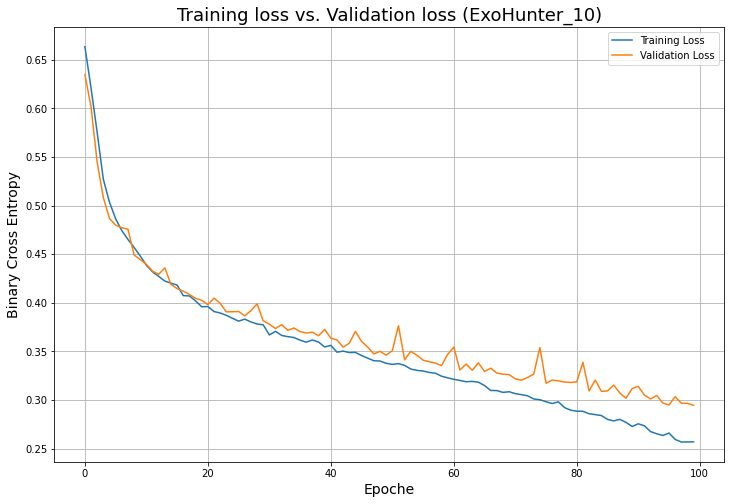

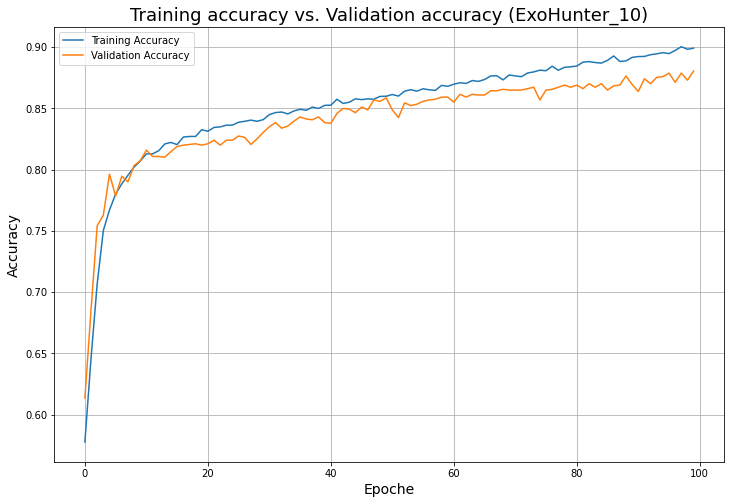

In [ ]:
import matplotlib.pyplot as plt

score_1 = model_1.evaluate(X_test, Y_test, verbose=0)
score_2 = model_2.evaluate(X_test, Y_test, verbose=0)
score_3 = model_3.evaluate(X_test, Y_test, verbose=0)
score_4 = model_4.evaluate(X_test, Y_test, verbose=0)
score_5 = model_5.evaluate(X_test, Y_test, verbose=0)
score_6 = model_6.evaluate(X_test, Y_test, verbose=0)
score_7 = model_7.evaluate(X_test, Y_test, verbose=0)
score_8 = model_8.evaluate(X_test, Y_test, verbose=0)
score_9 = model_9.evaluate(X_test, Y_test, verbose=0)
score_10 = model_10.evaluate(X_test, Y_test, verbose=0)
print('(ExoHunter_1) Test accuracy: {}'.format(score_1[1]))
print('(ExoHunter_2) Test accuracy: {}'.format(score_2[1]))
print('(ExoHunter_3) Test accuracy: {}'.format(score_3[1]))
print('(ExoHunter_4) Test accuracy: {}'.format(score_4[1]))
print('(ExoHunter_5) Test accuracy: {}'.format(score_5[1]))
print('(ExoHunter_6) Test accuracy: {}'.format(score_6[1]))
print('(ExoHunter_7) Test accuracy: {}'.format(score_7[1]))
print('(ExoHunter_8) Test accuracy: {}'.format(score_8[1]))
print('(ExoHunter_9) Test accuracy: {}'.format(score_9[1]))
print('(ExoHunter_10) Test accuracy: {}'.format(score_10[1]))

plt.figure(0)
plt.figure(figsize=(12,8))
plt.plot(history_10['loss'], label = 'Training Loss')
plt.plot(history_10['val_loss'], label = 'Validation Loss')
plt.legend()
plt.grid()
plt.title('Training loss vs. Validation loss (ExoHunter_10)',fontsize = 18)
plt.xlabel('Epoche', fontsize = 14)
plt.ylabel('Binary Cross Entropy',fontsize = 14)
plt.savefig('model_training_history_10',dpi = 300)

plt.figure(1)
plt.figure(figsize=(12,8))
plt.plot(history_10['accuracy'], label = 'Training Accuracy')
plt.plot(history_10['val_accuracy'], label = 'Validation Accuracy')
plt.legend()
plt.grid()
plt.title('Training accuracy vs. Validation accuracy (ExoHunter_10)',fontsize = 18)
plt.xlabel('Epoche',fontsize = 14)
plt.ylabel('Accuracy',fontsize = 14)
plt.savefig('model_training_accuracy_10',dpi = 300)

plt.show()

Calcolo della *accuracy* media

In [ ]:
total_accuracy = score_1[1] + score_2[1] + score_3[1] + score_4[1] + score_5[1] + score_6[1] + score_7[1] + score_8[1] + score_9[1] + score_10[1]
print('Mean accuracy:',np.round(total_accuracy/10,2))

Mean accuracy: 0.89


Calcolo del AUC *score* medio e grafico della curva ROC per il modello `ExoHunter_10`

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix
import seaborn as sns

prediction_1 = model_1.predict(X_test)
prediction_2 = model_2.predict(X_test)
prediction_3 = model_3.predict(X_test)
prediction_4 = model_4.predict(X_test)
prediction_5 = model_5.predict(X_test)
prediction_6 = model_6.predict(X_test)
prediction_7 = model_7.predict(X_test)
prediction_8 = model_8.predict(X_test)
prediction_9 = model_9.predict(X_test)
prediction_10 = model_10.predict(X_test)

score_1 = roc_auc_score(Y_test,prediction_1)
score_2 = roc_auc_score(Y_test,prediction_2)
score_3 = roc_auc_score(Y_test,prediction_3)
score_4 = roc_auc_score(Y_test,prediction_4)
score_5 = roc_auc_score(Y_test,prediction_5)
score_6 = roc_auc_score(Y_test,prediction_6)
score_7 = roc_auc_score(Y_test,prediction_7)
score_8 = roc_auc_score(Y_test,prediction_8)
score_9 = roc_auc_score(Y_test,prediction_9)
score_10 = roc_auc_score(Y_test,prediction_10)

total_score = score_1 + score_2 + score_3 + score_4 + score_5 + score_6 + score_7 + score_8 + score_9 + score_10
print('Mean AUC:',np.round(total_score/10,2))

fpr, tpr, thresh = roc_curve(Y_test, prediction_10)


plt.figure(0,figsize=(12,9))

plt.plot(fpr, tpr, marker='.')
plt.title('Curva ROC-AUC (ExoHunter_10)',fontsize = 18)
plt.xlabel('False positive rate', fontsize = 14)
plt.ylabel('True positive rate', fontsize = 14)
plt.grid(visible = True, axis = 'both')
plt.savefig('roc_auc_curve',dpi = 300)
plt.show()

Calcolo e grafico della matrice di confusione media

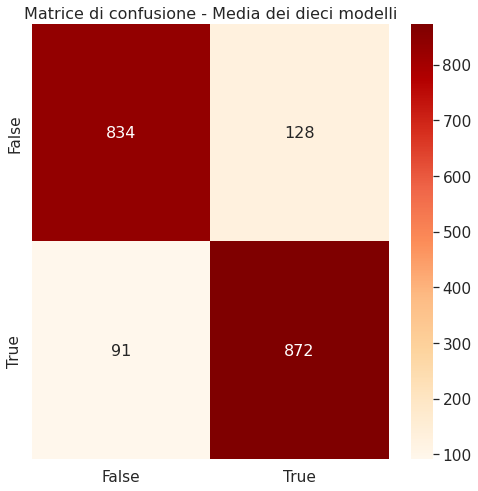

In [ ]:
binary_prediction_1 = []
binary_prediction_2 = []
binary_prediction_3 = []
binary_prediction_4 = []
binary_prediction_5 = []
binary_prediction_6 = []
binary_prediction_7 = []
binary_prediction_8 = []
binary_prediction_9 = []
binary_prediction_10 = []

for item in prediction_1:
  if item >= 0.5: binary_prediction_1.append(1)
  else: binary_prediction_1.append(0)

for item in prediction_2:
  if item >= 0.5: binary_prediction_2.append(1)
  else: binary_prediction_2.append(0)

for item in prediction_3:
  if item >= 0.5: binary_prediction_3.append(1)
  else: binary_prediction_3.append(0)

for item in prediction_4:
  if item >= 0.5: binary_prediction_4.append(1)
  else: binary_prediction_4.append(0)

for item in prediction_5:
  if item >= 0.5: binary_prediction_5.append(1)
  else: binary_prediction_5.append(0)

for item in prediction_6:
  if item >= 0.5: binary_prediction_6.append(1)
  else: binary_prediction_6.append(0)

for item in prediction_7:
  if item >= 0.5: binary_prediction_7.append(1)
  else: binary_prediction_7.append(0)

for item in prediction_8:
  if item >= 0.5: binary_prediction_8.append(1)
  else: binary_prediction_8.append(0)

for item in prediction_9:
  if item >= 0.5: binary_prediction_9.append(1)
  else: binary_prediction_9.append(0)

for item in prediction_10:
  if item >= 0.5: binary_prediction_10.append(1)
  else: binary_prediction_10.append(0)

binary_prediction_1 = np.array(binary_prediction_1)
binary_prediction_2 = np.array(binary_prediction_2)
binary_prediction_3 = np.array(binary_prediction_3)
binary_prediction_4 = np.array(binary_prediction_4)
binary_prediction_5 = np.array(binary_prediction_5)
binary_prediction_6 = np.array(binary_prediction_6)
binary_prediction_7 = np.array(binary_prediction_7)
binary_prediction_8 = np.array(binary_prediction_8)
binary_prediction_9 = np.array(binary_prediction_9)
binary_prediction_10 = np.array(binary_prediction_10)

matrix_1 = confusion_matrix(Y_test,binary_prediction_1)
matrix_2 = confusion_matrix(Y_test,binary_prediction_2)
matrix_3 = confusion_matrix(Y_test,binary_prediction_3)
matrix_4 = confusion_matrix(Y_test,binary_prediction_4)
matrix_5 = confusion_matrix(Y_test,binary_prediction_5)
matrix_6 = confusion_matrix(Y_test,binary_prediction_6)
matrix_7 = confusion_matrix(Y_test,binary_prediction_7)
matrix_8 = confusion_matrix(Y_test,binary_prediction_8)
matrix_9 = confusion_matrix(Y_test,binary_prediction_9)
matrix_10 = confusion_matrix(Y_test,binary_prediction_10)

m00 = (matrix_1[0,0] + matrix_2[0,0] + matrix_3[0,0] + matrix_4[0,0] + matrix_5[0,0] + matrix_6[0,0] + matrix_7[0,0] + matrix_8[0,0] + matrix_9[0,0] + matrix_10[0,0])/10
m01 = (matrix_1[0,1] + matrix_2[0,1] + matrix_3[0,1] + matrix_4[0,1] + matrix_5[0,1] + matrix_6[0,1] + matrix_7[0,1] + matrix_8[0,1] + matrix_9[0,1] + matrix_10[0,1])/10
m10 = (matrix_1[1,0] + matrix_2[1,0] + matrix_3[1,0] + matrix_4[1,0] + matrix_5[1,0] + matrix_6[1,0] + matrix_7[1,0] + matrix_8[1,0] + matrix_9[1,0] + matrix_10[1,0])/10
m11 = (matrix_1[1,1] + matrix_2[1,1] + matrix_3[1,1] + matrix_4[1,1] + matrix_5[1,1] + matrix_6[1,1] + matrix_7[1,1] + matrix_8[1,1] + matrix_9[1,1] + matrix_10[1,1])/10

m00 = np.around(m00)
m01 = np.around(m01)
m10 = np.around(m10)
m11 = np.around(m11)

array = np.array([[m00,m01],
                  [m10,m11]],dtype = int)
plt.figure(0,figsize=(8,8))
sns.set(font_scale=1.4)
sns.heatmap(array, annot = True, fmt = 'g',xticklabels=['False','True'],yticklabels=['False','True'],annot_kws={'size': 16},cmap="OrRd")
plt.title('Matrice di confusione - Media dei dieci modelli',fontsize = 16)
plt.savefig('confusion_matrix',dpi = 300)